================Projeto de Análise de Desempenho e Tendências do Sistema Fotovoltaico no Brasil===============

Este projeto tem como objetivo analisar as tendências de crescimento e queda da energia solar no Brasil, considerando o período de 2009 a 2025. A análise busca identificar padrões de sazonalidade, variações anuais e fatores que influenciam o desempenho do sistema fotovoltaico no país. Serão utilizadas técnicas de visualização de dados e estatística para compreender o comportamento da geração de energia solar ao longo dos anos e apoiar tomadas de decisão para o setor. os dados utilizados serão obtidos através de dados da ANEEL, que fornece informações detalhadas sobre a geração de energ#ia solar no Brasil. Esse projeto visa contribuir para o entendimento do crescimento da energia solar no país e auxiliar na formulação de políticas públicas e estratégias de investimento no setor, tambem ver como sistemas fotovoltaicos esta ficando saturado no Brasil, e como isso pode afetar o mercado de energia.

In [133]:
# BiBLIOTECAS NECESARIAS
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Lendo informaçoes dos dados 

In [134]:
# Caminho completo do arquivo
caminho_base = r"C:\Users\Usuario\Documents\empreendimento-gd-informacoes-tecnicas-fotovoltaica.csv"

# Tentando com outro encoding
df = pd.read_csv(
    caminho_base,
    sep=";",              # separador
    encoding="latin-1",   # troca de utf-8 para latin-1
    low_memory=False,
    on_bad_lines="skip"   # ignora linhas problemáticas
)

print("Base carregada com sucesso!")
print(df.head())

Base carregada com sucesso!
  DatGeracaoConjuntoDados CodGeracaoDistribuida MdaAreaArranjo  \
0              2025-08-14                   NaN           5,82   
1              2025-08-14                   NaN           2,47   
2              2025-08-14                   NaN          14,89   
3              2025-08-14                   NaN           4,23   
4              2025-08-14                   NaN           4,55   

  MdaPotenciaInstalada NomFabricanteModulo NomFabricanteInversor  DatConexao  \
0                 6,00              Não há                Não há  2024-02-01   
1                 5,00              Não há                Não há  2024-02-01   
2                 3,00              Não há                Não há  2024-02-01   
3                 5,00              Não há                Não há  2024-02-01   
4                 6,00              Não há                Não há  2024-02-01   

  MdaPotenciaModulos MdaPotenciaInversores  QtdModulos NomModeloModulo  \
0               6,00

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772788 entries, 0 to 3772787
Data columns (total 12 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   DatGeracaoConjuntoDados  object
 1   CodGeracaoDistribuida    object
 2   MdaAreaArranjo           object
 3   MdaPotenciaInstalada     object
 4   NomFabricanteModulo      object
 5   NomFabricanteInversor    object
 6   DatConexao               object
 7   MdaPotenciaModulos       object
 8   MdaPotenciaInversores    object
 9   QtdModulos               int64 
 10  NomModeloModulo          object
 11  NomModeloInversor        object
dtypes: int64(1), object(11)
memory usage: 345.4+ MB


In [136]:
df.head()

,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor
0,2025-08-14,NaN,"5,82","6,00",Não há,Não há,2024-02-01,"6,00","6,00",852,Não há,Não há
1,2025-08-14,NaN,"2,47","5,00",Não há,Não há,2024-02-01,"5,00","5,00",75,Não há,Não há
2,2025-08-14,NaN,"14,89","3,00",Não há,Não há,2024-02-01,"3,00","3,00",626,Não há,Não há
3,2025-08-14,NaN,"4,23","5,00",Não há,Não há,2024-02-01,"5,00","5,00",424,Não há,Não há
4,2025-08-14,NaN,"4,55","6,00",Não há,Não há,2024-02-01,"6,00","6,00",495,Não há,Não há


In [137]:
df.tail()

,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor
3772783,2025-08-14,GD.TO.003.420.320,"40,00","9,00",7 - JA SOLAR,6 - WEG,2025-07-09,"10,08","9,00",16,1267 - JAM72D42-630LB,651 - SIW200G M090 W0
3772784,2025-08-14,GD.TO.003.420.321,"12,00","2,42",136 - TSUN,71 - DEYE,2025-07-04,"2,42","3,55",4,1223 - TS605S8E-132GANT,291 - SUN-6K-G
3772785,2025-08-14,GD.TO.003.420.322,"157,00","34,77",96 - OSDA SOLAR,35 - GROWATT,2025-07-08,"34,77","50,00",61,1269 - ODA570-36V-MH,624 - MAC 50KTL3-X MV
3772786,2025-08-14,GD.TO.003.420.323,"10,00","2,00",84 - SUNOVA,71 - DEYE,2025-07-07,"2,28","2,00",4,1047 - SS-BG570-72MDH(T),471 - SUN2000G3-US-220
3772787,2025-08-14,GD.TO.003.420.324,"58,00","10,00",96 - OSDA SOLAR,11 - SUNGROW,2025-07-07,"12,81","10,00",21,1249 - ODA610-33V-MHDRZ,1076 - SG10RS-L_x000D_


In [171]:
df.shape

(3772788, 12)

# Tratamento dos dados

In [138]:
# Criar uma cópia para não modificar os dados originais
df_tratado = df.copy()

In [139]:
# 1. Remover colunas desnecessárias
colunas_para_remover = [
        "DatGeracaoConjuntoDados", 
        "MdaAreaArranjo", 
        "NomModeloModulo",
        "NomModeloInversor"
    ]
df_tratado = df_tratado.drop(colunas_para_remover, axis=1)

In [140]:
# 2. Converter e tratar datas
df_tratado['DatConexao'] = pd.to_datetime(df_tratado['DatConexao'], errors='coerce')
df_tratado = df_tratado[df_tratado['DatConexao'].notna()]

In [141]:
 # 3. Remover duplicatas
df_tratado = df_tratado.drop_duplicates()

In [142]:
# 4. Tratar valores ausentes
df_tratado = df_tratado.dropna()

In [143]:
# 5. Criar colunas úteis para análise temporal
df_tratado['Ano'] = df_tratado['DatConexao'].dt.year
df_tratado['Mes'] = df_tratado['DatConexao'].dt.month

In [144]:
# 6. Converter colunas numéricas
if 'PotenciaModulo' in df_tratado.columns:
    df_tratado['PotenciaModulo'] = (df_tratado['PotenciaModulo']
                                   .astype(str)
                                   .str.replace(',', '.')
                                   .str.strip())
    
    # Conversão para numérico
    df_tratado['PotenciaModulo'] = pd.to_numeric(df_tratado['PotenciaModulo'], 
                                                errors='coerce')

In [145]:
# Validação dos dados tratados
print("Dimensões do conjunto de dados tratado:", df_tratado.shape)
print("\nValores ausentes:\n", df_tratado.isnull().sum())
print("\nTipos de dados:\n", df_tratado.dtypes)
df_tratado.head()

Dimensões do conjunto de dados tratado: (3772237, 10)

Valores ausentes:
 CodGeracaoDistribuida    0
MdaPotenciaInstalada     0
NomFabricanteModulo      0
NomFabricanteInversor    0
DatConexao               0
MdaPotenciaModulos       0
MdaPotenciaInversores    0
QtdModulos               0
Ano                      0
Mes                      0
dtype: int64

Tipos de dados:
 CodGeracaoDistribuida            object
MdaPotenciaInstalada             object
NomFabricanteModulo              object
NomFabricanteInversor            object
DatConexao               datetime64[ns]
MdaPotenciaModulos               object
MdaPotenciaInversores            object
QtdModulos                        int64
Ano                               int32
Mes                               int32
dtype: object


,CodGeracaoDistribuida,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,Ano,Mes
39,GD.AC.000.000.590,"32,50",Canadian Solar,Fronius,2016-08-31,"36,80","32,50",112,2016,8
40,GD.AC.000.001.540,"2,00",Canadian Solar,Santerno,2016-10-31,"2,00","2,00",8,2016,10
41,GD.AC.000.001.552,"2,00",AV PROJECT,Fronius,2016-08-25,"2,00","2,00",8,2016,8
42,GD.AC.000.009.608,"5,00",Canadian Solar,Fronius,2017-03-09,"5,00","5,00",20,2017,3
43,GD.AC.000.017.465,"5,00",CANADIAN SOLAR,FRONIUS,2017-07-29,"5,00","5,00",16,2017,7


In [146]:
 # Padroniza os valores das colunas

def padronizar_valores(df_tratado, colunas_valores):
    
    for coluna in colunas_valores:
        if coluna in df_tratado.columns:
            df_tratado[coluna] = (df_tratado[coluna]
                                  .astype(str)
                                  .str.replace(',', '.')
                                  .str.strip())
            
            # Conversão para numérico
            df_tratado[coluna] = pd.to_numeric(df_tratado[coluna], 
                                               errors='coerce')
    return df_tratado

In [147]:
# Lista das colunas de potência para tratar
colunas_valores = [
    'MdaPotenciaInstalada',
    'MdaPotenciaModulos',
    'MdaPotenciaInversor'
]

In [148]:
# Aplicar o tratamento
df_tratado= padronizar_valores(df_tratado, colunas_valores)

In [149]:
df.tail()

,DatGeracaoConjuntoDados,CodGeracaoDistribuida,MdaAreaArranjo,MdaPotenciaInstalada,NomFabricanteModulo,NomFabricanteInversor,DatConexao,MdaPotenciaModulos,MdaPotenciaInversores,QtdModulos,NomModeloModulo,NomModeloInversor
3772783,2025-08-14,GD.TO.003.420.320,"40,00","9,00",7 - JA SOLAR,6 - WEG,2025-07-09,"10,08","9,00",16,1267 - JAM72D42-630LB,651 - SIW200G M090 W0
3772784,2025-08-14,GD.TO.003.420.321,"12,00","2,42",136 - TSUN,71 - DEYE,2025-07-04,"2,42","3,55",4,1223 - TS605S8E-132GANT,291 - SUN-6K-G
3772785,2025-08-14,GD.TO.003.420.322,"157,00","34,77",96 - OSDA SOLAR,35 - GROWATT,2025-07-08,"34,77","50,00",61,1269 - ODA570-36V-MH,624 - MAC 50KTL3-X MV
3772786,2025-08-14,GD.TO.003.420.323,"10,00","2,00",84 - SUNOVA,71 - DEYE,2025-07-07,"2,28","2,00",4,1047 - SS-BG570-72MDH(T),471 - SUN2000G3-US-220
3772787,2025-08-14,GD.TO.003.420.324,"58,00","10,00",96 - OSDA SOLAR,11 - SUNGROW,2025-07-07,"12,81","10,00",21,1249 - ODA610-33V-MHDRZ,1076 - SG10RS-L_x000D_


# Analise exploratória de algumas variáveis

In [150]:
# calculo de potência total instalada
potencia_total = df_tratado['MdaPotenciaInstalada'].sum()
print(f"Potência Total Instalada: {potencia_total:,.2f} kW")
print(f"Potência Total em MW: {potencia_total/1000:,.2f} MW")
print(f"Potência Total em GW: {potencia_total/1000000:,.2f} GW")

Potência Total Instalada: 42,078,246.92 kW
Potência Total em MW: 42,078.25 MW
Potência Total em GW: 42.08 GW


In [164]:
# Converter para GW e adicionar à tabela
potencia_anual['Potencia_Total_GW'] = potencia_anual['Potencia_Total_kW'] / 1000000

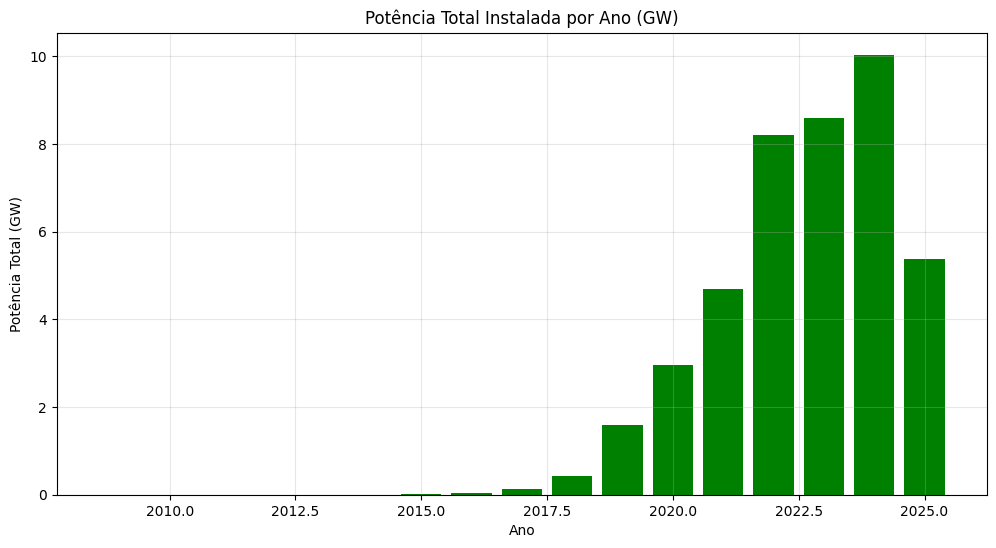

In [165]:
# Criar visualização em GW
plt.figure(figsize=(12, 6))
plt.bar(potencia_anual['Ano'], potencia_anual['Potencia_Total_GW'], color='green')
plt.title('Potência Total Instalada por Ano (GW)')
plt.xlabel('Ano')
plt.ylabel('Potência Total (GW)')
plt.grid(True, alpha=0.3)

In [169]:
# Mostrar tabela com valores em GW
print("\nEvolução Anual da Potência Instalada:")
print("=" * 50)
for _, row in potencia_anual.iterrows():
    print(f"Ano: {row['Ano']:<6} | Potência: {row['Potencia_Total_GW']:>8.2f} GW | Instalações: {row['Quantidade_Instalacoes']:>8}")


Evolução Anual da Potência Instalada:
Ano: 2009.0 | Potência:     0.00 GW | Instalações:     23.0
Ano: 2010.0 | Potência:     0.00 GW | Instalações:      5.0
Ano: 2011.0 | Potência:     0.00 GW | Instalações:     50.0
Ano: 2012.0 | Potência:     0.00 GW | Instalações:     47.0
Ano: 2013.0 | Potência:     0.00 GW | Instalações:     80.0
Ano: 2014.0 | Potência:     0.00 GW | Instalações:    285.0
Ano: 2015.0 | Potência:     0.01 GW | Instalações:   1318.0
Ano: 2016.0 | Potência:     0.05 GW | Instalações:   6409.0
Ano: 2017.0 | Potência:     0.13 GW | Instalações:  13400.0
Ano: 2018.0 | Potência:     0.42 GW | Instalações:  35932.0
Ano: 2019.0 | Potência:     1.59 GW | Instalações: 122845.0
Ano: 2020.0 | Potência:     2.96 GW | Instalações: 225763.0
Ano: 2021.0 | Potência:     4.70 GW | Instalações: 455353.0
Ano: 2022.0 | Potência:     8.22 GW | Instalações: 802627.0
Ano: 2023.0 | Potência:     8.60 GW | Instalações: 690432.0
Ano: 2024.0 | Potência:    10.04 GW | Instalações: 896448.0
A

In [170]:
# Mostrar totais
print("\nResumo Geral:")
print("=" * 50)
print(f"Potência Total Acumulada: {potencia_anual['Potencia_Total_GW'].sum():.2f} GW")
print(f"Total de Instalações: {potencia_anual['Quantidade_Instalacoes'].sum():,}")
print(f"Média de Potência por Ano: {potencia_anual['Potencia_Total_GW'].mean():.2f} GW")


Resumo Geral:
Potência Total Acumulada: 42.08 GW
Total de Instalações: 3,772,237
Média de Potência por Ano: 2.48 GW
